# Homework 1

## Perrin Anto - paj2117

### Due: Sat Oct. 12 @ 11:59pm

In this homework we'll do some data exploration and perform an A/B test.


## Instructions

Follow the comments below and fill in the blanks (____) to complete.

Where a text response is asked for, please enter as a comment, starting each line with #.

# Environment Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sns.set_style('darkgrid')

%matplotlib inline

## Part 1: Data Exploration

One data science task, and a common one used for data science interviews, is to predict defaults on loans.<br>
We're going to load a subset of a common loan dataset and explore some of the features.

Here is a brief description of the features included:

- **loan_amnt**: The amount of money applied for
- **term**: The period over which the load should be repaid
- **annual_inc**: Annual income of the borrower
- **purpose**: The purpose of the loan, such as: credit_card, debt_consolidation, etc.
- **home_ownership**: The borrower's relationship with their primary residence
- **outcome**: The result of the loan

In [2]:
# 1. (1pt) Load the data from ../data/loan_data_subset.csv into the variable df

df = pd.read_csv("../data/loan_data_subset.csv")

In [3]:
# 2. (1pt) Print out information about the dataframe using .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
loan_amnt         20000 non-null int64
term              20000 non-null object
annual_inc        20000 non-null int64
purpose           20000 non-null object
home_ownership    20000 non-null object
outcome           20000 non-null object
dtypes: int64(2), object(4)
memory usage: 937.6+ KB


In [4]:
# 3. (1pt) Looking at the info print out, how many values are missing (null)?

# There are no missing values

In [5]:
# 4. (1pt) Using .shape, how many rows does the dataset have?

print(f'dataframe has', df.shape[0], 'rows')

dataframe has 20000 rows


In [6]:
# 5. (1pt) Print the first 5 rows of the dataset using .head

df.head()

,loan_amnt,term,annual_inc,purpose,home_ownership,outcome
0,11000,60 months,59004,home_improvement,MORTGAGE,paid off
1,14000,36 months,120000,credit_card,RENT,default
2,10000,36 months,110000,small_business,MORTGAGE,default
3,23350,60 months,65000,debt_consolidation,MORTGAGE,default
4,12000,60 months,49000,major_purchase,MORTGAGE,paid off


In [7]:
# 6. (1pt) Print out rows with labels 100 to 104 inclusive, with all columns, using .loc
#   Note that we're using row labels and not positional index, so use .loc instead of .iloc

df.loc[100:104]

,loan_amnt,term,annual_inc,purpose,home_ownership,outcome
100,4200,60 months,44500,home_improvement,OWN,default
101,18000,60 months,117000,debt_consolidation,MORTGAGE,paid off
102,4375,36 months,35000,house,RENT,default
103,15000,60 months,52884,debt_consolidation,MORTGAGE,paid off
104,24000,36 months,56758,debt_consolidation,MORTGAGE,paid off


In [8]:
# 7. (1pt) What appears to be one numeric feature included in the dataset (column label)?

# loan_amnt

In [9]:
# 8. (1pt) What appears to be one categorical feature in the dataset?

# purpose

In [10]:
# 9. (1pt) What appears to be one ordinal feature in the dataset?

# term

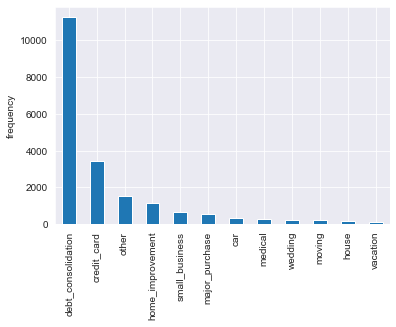

In [11]:
# 10. (1pt) Plot the frequencies of the values in 'purpose' using .value_counts() and .plot.bar()
df.purpose.value_counts().plot.bar();

# 11. (1pt) label the y axis as 'frequency'
plt.ylabel('frequency');

In [12]:
# 12. (1pt) Print out the summary statistics of the annual_inc column using .describe()

df.annual_inc.describe()

count    2.000000e+04
mean     6.824335e+04
std      4.420020e+04
min      2.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.200000e+04
max      1.200000e+06
Name: annual_inc, dtype: float64

In [13]:
# There appears to be a fairly large difference between mean and median

# 13. (1pt) calculate the mean of annual_inc using .mean()
annual_inc_mean = df.annual_inc.mean()

# 14. (1pt) calculate the median of annual_inc using .median()
annual_inc_median = df.annual_inc.median()

# 15. (1pt) what is the difference (to 2 significant digits) between the mean and median of annual_inc?
diff = annual_inc_mean - annual_inc_median
print(f'mean - median = {diff:0.2f}')

mean - median = 8243.35


In [14]:
# 16. (1pt) Why might there be such a large difference between mean and median?

# The max value appears to be an outlier from the rest of the dataset. The median is robust to outliers, while the mean is not. This accounts for the possible large difference.

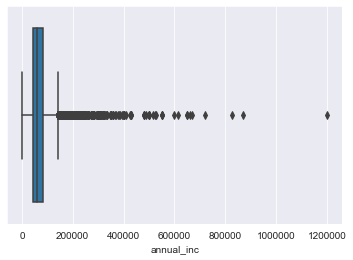

In [15]:
# 17. (1pt) Generate a boxplot of annual_inc using sns.boxplot
sns.boxplot(df.annual_inc);

99th percentile of annual_inc: 225010.00


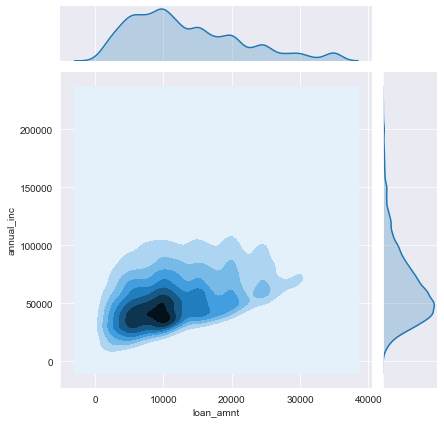

In [16]:
# It certainly looks like annual_inc is skewed to the right.

# 18. (1pt) What is the 99th percentile of annual_inc? (use np.percentile)
#    Eg. Where is the cutoff where we remove extremely high values but keep 99% of the data?
annual_inc_99 = np.percentile(df.annual_inc,99);
print(f'99th percentile of annual_inc: {annual_inc_99:0.2f}')
      
# 19. (3pt) Plot loan_amnt (x-axis) against annual_inc (y-axis) using jointplot 
#     only including rows where annual_inc < annual_inc_99
sns.jointplot(x='loan_amnt', y='annual_inc', data=df[df.annual_inc < annual_inc_99], kind='kde');

In [17]:
# As we saw above, 'debt_consolidation' is the most common purpose for a loan.
#
# 20. (2pt) What is the mean loan_amnt where:
#    df.purpose == 'debt_consolidation' and df.annual_inc < annual_inc_99?

amnt = df.loc[(df.purpose == 'debt_consolidation') & (df.annual_inc < annual_inc_99),"loan_amnt"].mean()
print(f'mean loan amount for debt consolidation for most annual incomes: {amnt:0.2f}')

mean loan amount for debt consolidation for most annual incomes: 14166.53


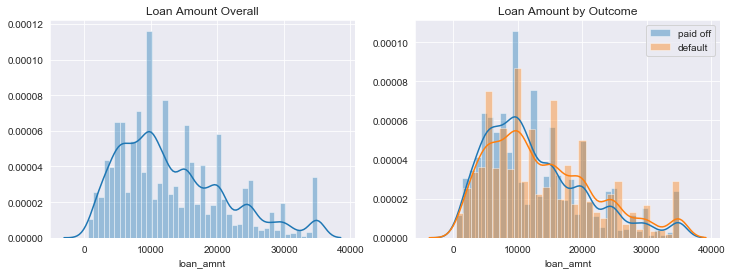

In [18]:
# One purpose of this dataset is to attempt to predict loan outcome.
# Here, we'll create 2 plots, one of loan_amnt overall and another with loan_amnt by outcome.

# 21. (2pt) create a subplot with 1 row and 2 columns with figsize of (12,4)
fig,ax = fig,ax = plt.subplots(1,2,figsize=(12,4))

# 22. (1pt) on the first set of axes (ax[0]) use distplot to plot the distribution of loan_amnt
sns.distplot(df.loan_amnt, ax=ax[0]);

# 23. (1pt) set the title on the first plot to be 'Loan Amount Overall'
ax[0].set(title='Loan Amount Overall');

# 24. (2pt) on the second set of axes (ax[1]) 
#    use loc and distplot to plot loan_amnt where df.outcome == 'paid off' and set label='paid off'
sns.distplot(df.loc[df.outcome == 'paid off',"loan_amnt"], label='paid off', ax=ax[1]);

# 25. (2pt) again on the second set of axes (ax[1]) 
#    use loc and distplot to plot loan_amnt where df.outcome == 'default' and set label='default'
sns.distplot(df.loc[df.outcome == 'default',"loan_amnt"], label='default', ax=ax[1]);

# 26. (1pt) set the title on the second plot to be 'Loan Amount by Outcome'
ax[1].set(title='Loan Amount by Outcome');

# 27. (1pt) finally, add a legend to ax[1]
plt.legend();

## Part 2: Hypothesis Testing with an A/B test

Suppose we work at a large company that is developing online data science tools.

Currently the tool has interface type A but we'd like to know if using interface tool B might be more efficient.
To measure this, we'll look at length of active work on a project (aka project length).

We'll perform an A/B test where half of the projects will use interface A and half will use interface B.

In [19]:
# 28. (2pt) Read in project lengths from '../data/project_lengths' into df_project and print out its .info
df_project = pd.read_csv("../data/project_lengths.csv")
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
lengths_A    1000 non-null float64
lengths_B    1000 non-null float64
dtypes: float64(2)
memory usage: 15.8 KB


In [20]:
# 29. (3pt) calculate the difference in mean project length between interface A and B (mean B - mean A)
#     print the result with 2 significant digits
observed_mean_diff = df_project.lengths_B.mean() - df_project.lengths_A.mean()
print(f'observed difference: {observed_mean_diff:0.2f}')

observed difference: -1.58


In [21]:
# We'll perform a permutation test to see how significant this result is
# generate 10000 random permutation samples of mean difference

rand_mean_diffs = [] 
n_samples = 10000
combined_times = np.concatenate([df_project.lengths_A.values, df_project.lengths_B.values])
n_A = sum(df_project.lengths_A.notnull()) # number of observations for page A

for i in range(n_samples):
    
    # 30. (1pt) get a random permutation of combined_times
    rand_perm = np.random.permutation(combined_times)
    
    # 31. (1pt) take the mean of the first n_A random values
    rand_mean_A = rand_perm[:n_A].mean()
    
    # 32. (1pt) take the mean of the remaining random values
    rand_mean_B = rand_perm[n_A:].mean()
    
    # 33. (1pt) append the difference (rand_mean_B - rand_mean_A) to rand_mean_diffs
    rand_mean_diffs.append(rand_mean_B - rand_mean_A)
    
# check that we have the correct amount of data by printing out the length of rand_mean_diffs
# this should equal n_samples
print(len(rand_mean_diffs))

10000


In [22]:
# Before we plot the data, let's transform all values to their z-score

# 34. (1pt) calculate the sample mean of our rand_mean_diffs using np.mean
mean_rand_mean_diffs = np.mean(rand_mean_diffs)

# 35. (1pt) calculate the sample standard deviation using np.std
std_rand_mean_diffs = np.std(rand_mean_diffs)

# 36. (2pt) transform rand_mean_diffs to rand_mean_diffs_zscore by subtracting the mean and dividing by the std dev
rand_mean_diffs_zscore = (rand_mean_diffs - mean_rand_mean_diffs) / std_rand_mean_diffs

# 37. (2pt) transform the observed_mean_diff to observed_mean_diff_zscore by subtracting the mean and dividing by the std dev
observed_mean_diff_zscore = (observed_mean_diff - mean_rand_mean_diffs) / std_rand_mean_diffs

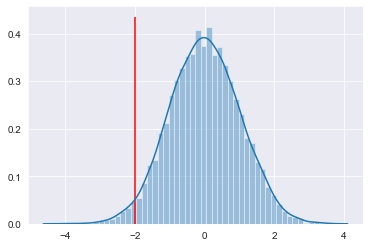

In [23]:
# 38. (2pt) Use seaborn distplot to plot the distribution of rand_mean_diffs_zscore, capture the return in ax
ax = sns.distplot(rand_mean_diffs_zscore);

# 39. (2pt) use ax.vlines with *ax.get_ylim() to plot a line at our observed_mean_diff_zscore
ax.vlines(observed_mean_diff_zscore, *ax.get_ylim(), color='r');

In [24]:
# the plot seems to indicate a likely difference in scores
# 
# 40. (3pt) calculate a two-tailed p_value (to three significant digits)
#    using np.abs, len rand_mean_diffs and observed_mean_diff
p_value = sum(np.abs(np.array(rand_mean_diffs)) >= np.abs(observed_mean_diff))/len(rand_mean_diffs)
print(f'p_value: {p_value:0.3f}')

p_value: 0.044
